In [1]:
import pandas as pd
import numpy as np

In [37]:
array = np.array([83.2, 78.41, 85.86, 85.51, 82.35, 83.85, 83.21, 78.5, 84.17, 83.2, 83.51, 84.8, 83.81, 79.86, 86.79, 80.7, 86.99, 84.6, 83.5, 84.12, 84.85, 86.25, 81.39, 84.44, 85.31, 81.46, 88.00, 83.26, 87.71, 92.23, 75.41, 78.56, 75.80, 85.3, 79.25, 78.17, 87.09, 78.06, 81.03, 88.43, 87.28, 83.35, 88.79, 82.05, 84.67, 90.67, 83.83, 84.52, 91.37, 81.16, 88.27, 87.79, 88.81, 86.4, 91.69, 82.56, 88.9, 91.54, 82.69, 90.14, 89.46, 81.63, 90.44, 87.61, 85.61, 88.8, 90.74, 82.65, 88.52, 89.68, 85.70, 89.94, 87.07, 86.09, 91.6, 88.79, 89.01, 88.81, 87.10, 87.98, 88.90, 87.63, 88.45, 88.99, 89.04, 81.54, 93.96, 83.50, 92.06, 89.14, 87.46, 87.54, 86.63, 89.73, 87.99, 86.3, 91.42, 80.88, 88.18, 88.77, 90.79, 87.09, 88.52, 87.11, 83.68, 92.36, 87.11, 85.6, 90.61, 80.73, 87.46, 88.3, 90.19, 83.05, 92.01, 85.91, 85.67, 92.08, 85.17, 87.21, 90.91, 83.33, 97.59, 93.67, 85.81, 90.33, 93.5, 87.84, 91.01, 93.37, 88.97, 95.1, 91.03, 86.92, 99.88, 92.37, 92.73, 93.47, 94.39, 91.77, 93.32, 93.1, 94.75, 95.93])

In [45]:
meses = pd.date_range('2010-01-01','2021-12-01', 
              freq='MS').tolist()

In [39]:
array

array([83.2 , 78.41, 85.86, 85.51, 82.35, 83.85, 83.21, 78.5 , 84.17,
       83.2 , 83.51, 84.8 , 83.81, 79.86, 86.79, 80.7 , 86.99, 84.6 ,
       83.5 , 84.12, 84.85, 86.25, 81.39, 84.44, 85.31, 81.46, 88.  ,
       83.26, 87.71, 92.23, 75.41, 78.56, 75.8 , 85.3 , 79.25, 78.17,
       87.09, 78.06, 81.03, 88.43, 87.28, 83.35, 88.79, 82.05, 84.67,
       90.67, 83.83, 84.52, 91.37, 81.16, 88.27, 87.79, 88.81, 86.4 ,
       91.69, 82.56, 88.9 , 91.54, 82.69, 90.14, 89.46, 81.63, 90.44,
       87.61, 85.61, 88.8 , 90.74, 82.65, 88.52, 89.68, 85.7 , 89.94,
       87.07, 86.09, 91.6 , 88.79, 89.01, 88.81, 87.1 , 87.98, 88.9 ,
       87.63, 88.45, 88.99, 89.04, 81.54, 93.96, 83.5 , 92.06, 89.14,
       87.46, 87.54, 86.63, 89.73, 87.99, 86.3 , 91.42, 80.88, 88.18,
       88.77, 90.79, 87.09, 88.52, 87.11, 83.68, 92.36, 87.11, 85.6 ,
       90.61, 80.73, 87.46, 88.3 , 90.19, 83.05, 92.01, 85.91, 85.67,
       92.08, 85.17, 87.21, 90.91, 83.33, 97.59, 93.67, 85.81, 90.33,
       93.5 , 87.84,

In [54]:
df = pd.DataFrame({'mes': meses, 'value':array})

In [55]:
df

,mes,value
0,2010-01-01,83.20
1,2010-02-01,78.41
2,2010-03-01,85.86
3,2010-04-01,85.51
4,2010-05-01,82.35
...,...,...
139,2021-08-01,91.77
140,2021-09-01,93.32
141,2021-10-01,93.10
142,2021-11-01,94.75


In [53]:
df = df.set_index(['mes'])

In [56]:
from statsmodels.tsa.stattools import adfuller, kpss

def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(df['value'].values)

KPSS Statistic: 1.3359063889372789
p-value: 0.01
num lags: 8
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


c:\Users\Celia\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


In [58]:
stat, p, lags, obs, crit, t = adfuller(df['value'].values)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')

stat=-0.021, p=0.957
Probably not Stationary


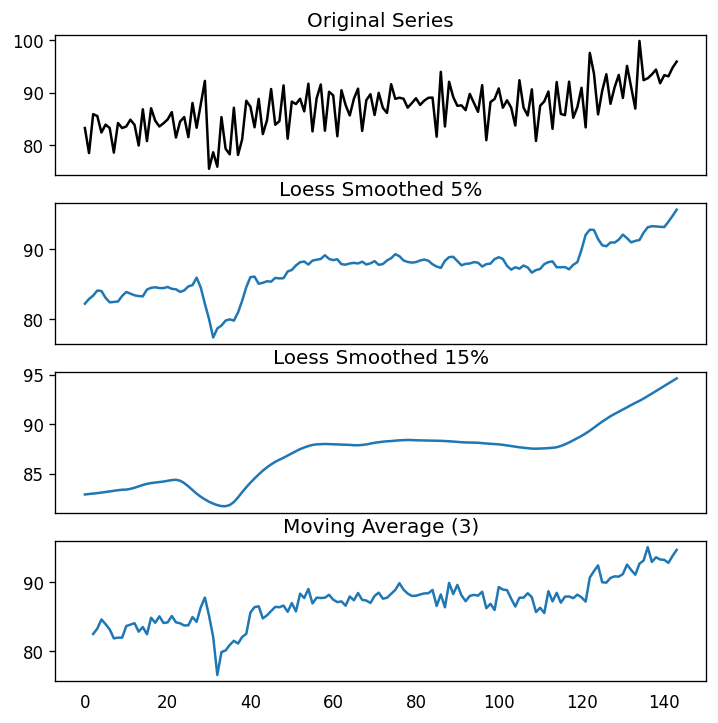

In [59]:
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.pyplot as plt


plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})


# 1. Moving Average
df_ma = df.value.rolling(3).mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df.value, np.arange(len(df.value)), frac=0.05)[:, 1], index=df.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df.value, np.arange(len(df.value)), frac=0.15)[:, 1], index=df.index, columns=['value'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
plt.show()

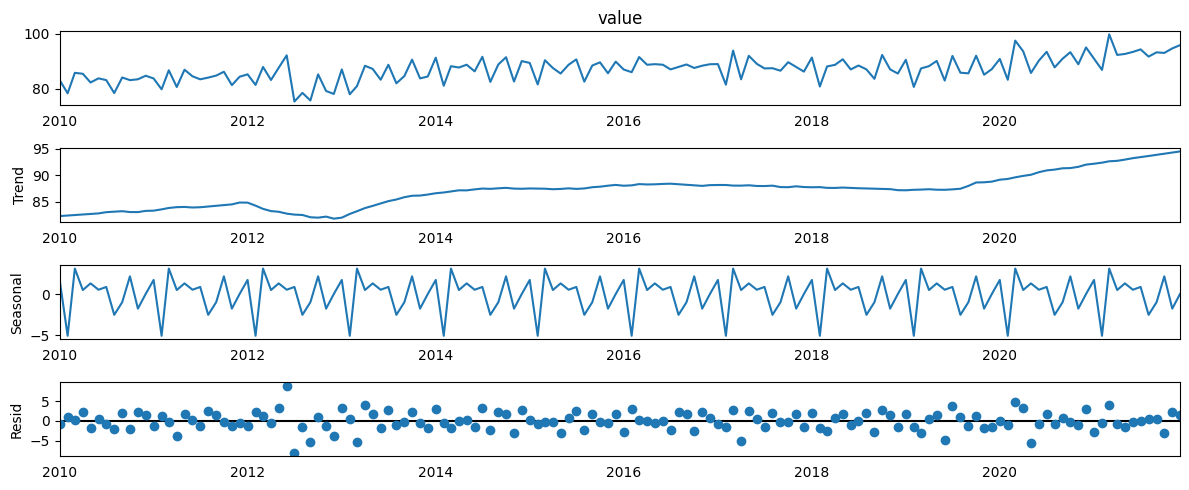

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose

df = df.set_index('mes').asfreq('MS')

result_add = seasonal_decompose(df['value'], model='ad', extrapolate_trend='freq')

from pylab import rcParams
rcParams['figure.figsize'] = 12,5
result_add.plot();

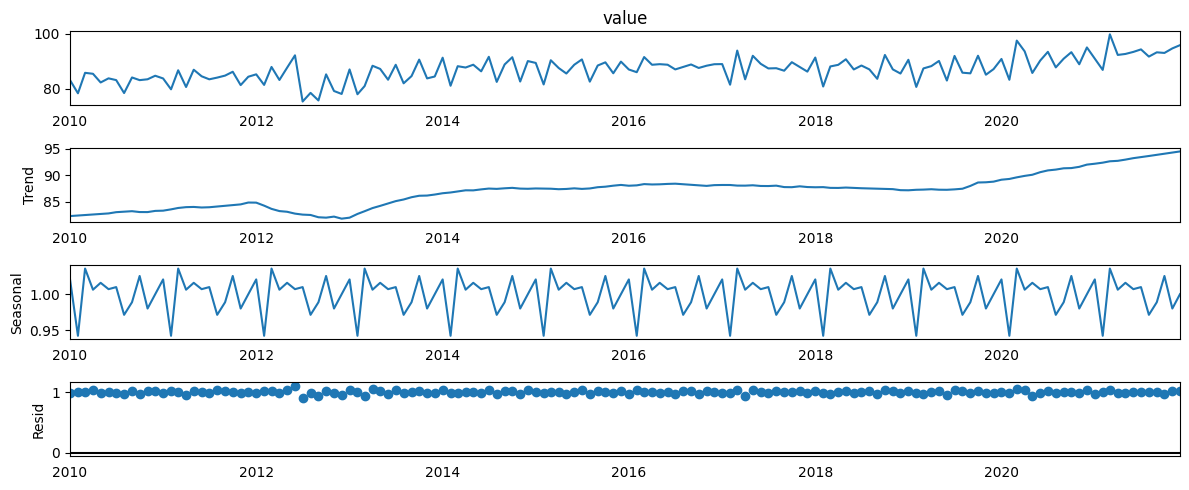

In [62]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model = 'multiplicative', extrapolate_trend = 'freq')

# Plot
rcParams['figure.figsize'] = 12,5
result_mul.plot();

In [64]:
df_log = np.log(df)

In [65]:
train_log = df_log.iloc[:-25,:]
test_log = df_log.iloc[-25:,:]

In [66]:
from pmdarima.arima import auto_arima
from pmdarima.arima import ARIMA

In [67]:
#primer modelo arima
model_ar = ARIMA(order=(1,0,0))
model_ar.fit(train_log)

ARIMA(order=(1, 0, 0))

In [68]:
predictions = model_ar.predict(25)

In [69]:
from sklearn.metrics import mean_squared_error
print("root_mean_squared_error:", np.sqrt(mean_squared_error(test_log, predictions)))

root_mean_squared_error: 0.07730257219393531


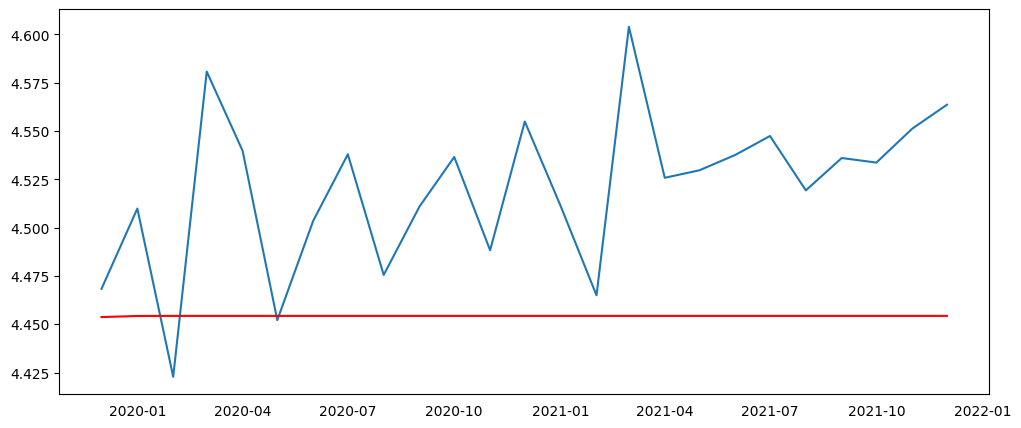

In [70]:
plt.plot(test_log)
plt.plot(predictions,color='red');

c:\Users\Celia\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\Users\Celia\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\Users\Celia\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\Users\Celia\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


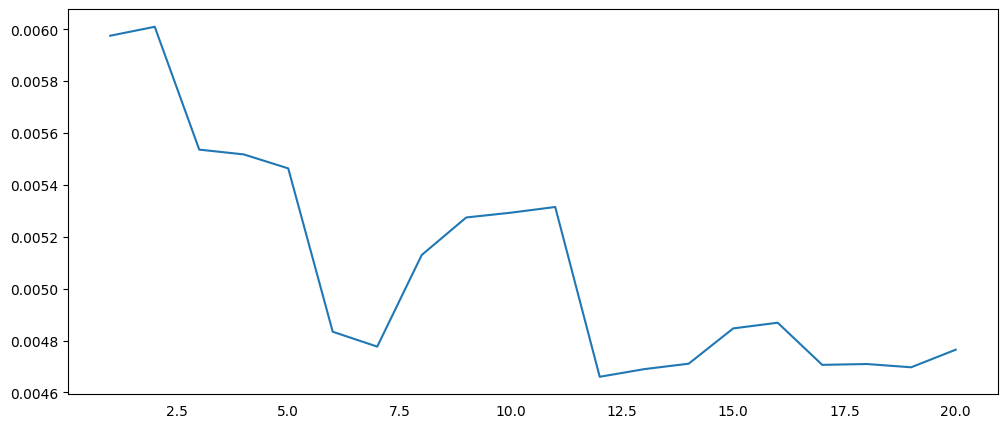

In [74]:
#probamos más modelos

lags = []
mse = []
for lag in range(1, 21):
    try:
        model_ar = ARIMA(order=(lag, 0, 0))
        model_ar.fit(train_log)
        lags.append(lag)
        predictions = model_ar.predict(25)
        mse.append(mean_squared_error(test_log, predictions))
    except:
        continue
    
plt.plot(lags, mse);

In [75]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq[:10]

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4)]

In [76]:
results = []
for param in pdq:
    try:
        model_arima = ARIMA(order=param)
        model_arima_fit = model_arima.fit(train_log)
        results.append((param,model_arima_fit.aic()))
    except:
        continue

c:\Users\Celia\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Celia\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Celia\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\Users\Celia\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters foun

In [77]:
resultados_df = pd.DataFrame(results, columns=['ARIMA params', 'AIC']).sort_values('AIC')
resultados_df

,ARIMA params,AIC
58,"(2, 1, 3)",-432.775395
79,"(3, 0, 4)",-431.853052
59,"(2, 1, 4)",-431.139475
83,"(3, 1, 3)",-430.744053
78,"(3, 0, 3)",-429.707497
...,...,...
70,"(2, 4, 0)",-95.855632
15,"(0, 3, 0)",-33.788379
21,"(0, 4, 1)",-25.705653
45,"(1, 4, 0)",7.259813


In [80]:
best_model = ARIMA(order=(2,1,3))
import pickle 
with open('model_arima_2_1_3', 'wb') as archivo_salida:
    pickle.dump(best_model, archivo_salida)
 

In [81]:
best_model.fit(train_log)

c:\Users\Celia\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(order=(2, 1, 3))

In [82]:
predictions = best_model.predict(25)
print("mean_squared_error:", mean_squared_error(test_log, predictions))

mean_squared_error: 0.0028052217483795013


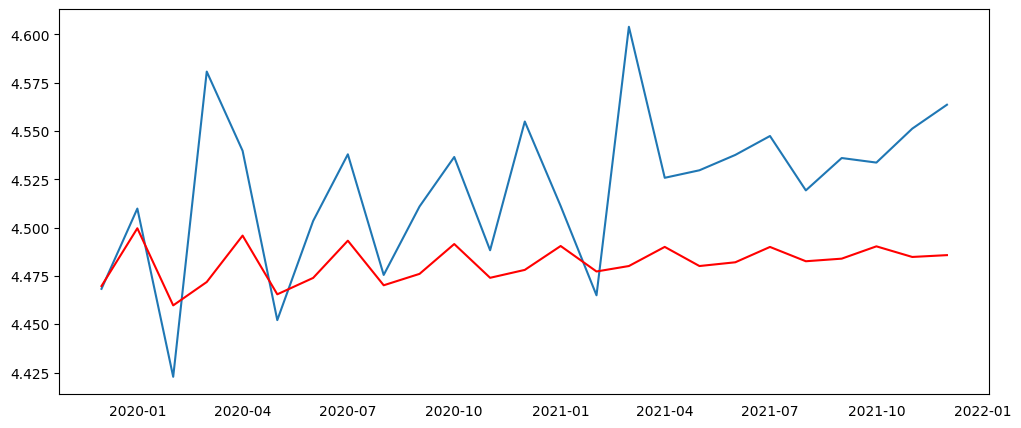

In [83]:
plt.plot(test_log)
plt.plot(predictions,color='red');

In [84]:
#AUTOARIMA

model = auto_arima(train_log,
                   start_p = 1,
                   start_q = 1,
                   max_p = 10,
                   max_q = 10,
                   max_d = 10,
                   m=12,
                   stationary=False,
                   trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-444.141, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-317.121, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-402.944, Time=0.31 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-430.591, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-319.120, Time=0.03 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=-434.864, Time=0.43 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=-439.749, Time=0.34 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=-439.553, Time=1.09 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=-440.628, Time=0.97 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-421.846, Time=0.12 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=-436.619, Time=0.97 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=-438.852, Time=0.98 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=-439.376, Time=1.18 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-433.332, Time=0.48 sec
 ARIMA(1,1,0)(1,0,1

In [85]:
model.fit(train_log)
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  119
Model:             SARIMAX(3, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 235.108
Date:                            Tue, 14 Feb 2023   AIC                           -454.215
Time:                                    20:19:19   BIC                           -432.050
Sample:                                01-01-2010   HQIC                          -445.215
                                     - 11-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.723e-06   3.89e-05      0.250      0.803   -6.66e-05     8.6e-05
ar.L1         -0.2973      0.115   

In [86]:
predictions = model.predict(25)

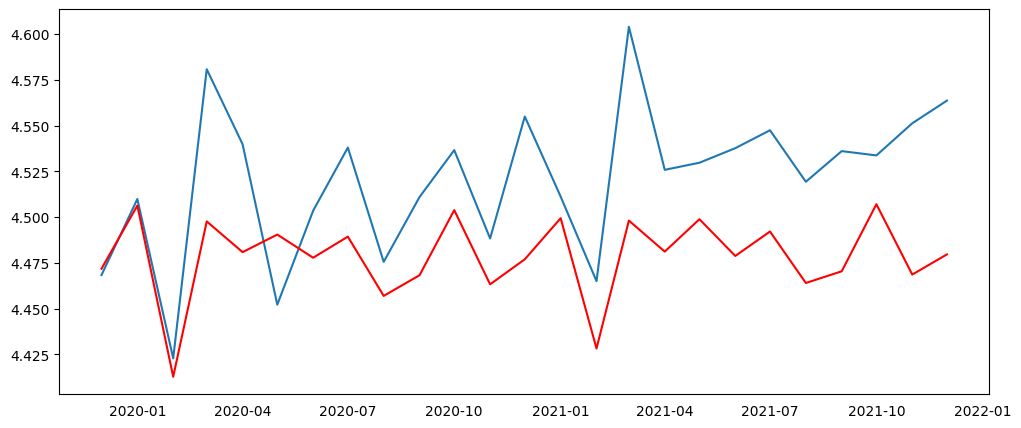

In [87]:
plt.plot(test_log)
plt.plot(predictions,color='red');

In [88]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(test_log.values, predictions.values))

0.04510288491667762


In [89]:
with open('model_sarimax', 'wb') as archivo_salida:
    pickle.dump(model, archivo_salida)

In [95]:
test_log.to_csv("test_arima.csv", index=False)

In [10]:
import datetime

print('my_', datetime.datetime.now().strftime('%Y%m%d%H%M%S'))

my_ 20230215084356


In [11]:
model.predict(25)

NameError: name 'model' is not defined